In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("data/cats_dogs"))
import numpy as np
import librosa
import keras
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Flatten,Activation,Dense,Dropout,BatchNormalization
from keras.optimizers import Adamax
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os  # Manipulate files
from  matplotlib import pyplot as plt
from IPython.display import clear_output

# Any results you write to the current directory are saved as output.

# List the wav files
ROOT_DIR = 'data/cats_dogs/'
X_path = os.listdir(ROOT_DIR)
# changing the values into 1 and 0
y = [0 if 'cat' in f else 1 for f in X_path]  # change y to int values

# Split train and test
train_input, test_input, train_target, test_target = train_test_split(X_path, y, test_size=0.30, random_state=1)


def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name,duration=5)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

i = 0
X_train = []
while i<len(train_input):
    print('processing file: ',i)
    filename = 'data/cats_dogs/' + train_input[i]
    mfccs, chroma, mel, contrast,tonnetz = extract_feature(filename)
    features = []
    features.append(np.mean(mfccs))
    features.append(np.mean(chroma))
    features.append(np.mean(mel))
    features.append(np.mean(contrast))
    features.append(np.mean(tonnetz))
    X_train.append(features)
    i = i +1

['cat_1.wav', 'cat_10.wav', 'cat_100.wav', 'cat_101.wav', 'cat_102.wav', 'cat_103.wav', 'cat_105.wav', 'cat_106.wav', 'cat_107.wav', 'cat_108.wav', 'cat_109.wav', 'cat_11.wav', 'cat_110.wav', 'cat_112.wav', 'cat_113.wav', 'cat_114.wav', 'cat_115.wav', 'cat_116.wav', 'cat_117.wav', 'cat_118.wav', 'cat_119.wav', 'cat_12.wav', 'cat_120.wav', 'cat_121.wav', 'cat_122.wav', 'cat_123.wav', 'cat_124.wav', 'cat_125.wav', 'cat_126.wav', 'cat_127.wav', 'cat_128.wav', 'cat_129.wav', 'cat_13.wav', 'cat_130.wav', 'cat_131.wav', 'cat_132.wav', 'cat_133.wav', 'cat_134.wav', 'cat_135.wav', 'cat_136.wav', 'cat_137.wav', 'cat_138.wav', 'cat_139.wav', 'cat_14.wav', 'cat_140.wav', 'cat_141.wav', 'cat_142.wav', 'cat_143.wav', 'cat_144.wav', 'cat_146.wav', 'cat_147.wav', 'cat_148.wav', 'cat_149.wav', 'cat_15.wav', 'cat_150.wav', 'cat_151.wav', 'cat_152.wav', 'cat_153.wav', 'cat_154.wav', 'cat_155.wav', 'cat_156.wav', 'cat_157.wav', 'cat_158.wav', 'cat_159.wav', 'cat_16.wav', 'cat_160.wav', 'cat_161.wav', 'ca

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


processing file:  8
processing file:  9
processing file:  10
processing file:  11
processing file:  12
processing file:  13
processing file:  14
processing file:  15
processing file:  16
processing file:  17
processing file:  18
processing file:  19
processing file:  20
processing file:  21
processing file:  22
processing file:  23
processing file:  24
processing file:  25
processing file:  26
processing file:  27
processing file:  28
processing file:  29
processing file:  30
processing file:  31
processing file:  32
processing file:  33
processing file:  34
processing file:  35
processing file:  36
processing file:  37
processing file:  38
processing file:  39
processing file:  40
processing file:  41
processing file:  42
processing file:  43
processing file:  44
processing file:  45
processing file:  46
processing file:  47
processing file:  48
processing file:  49
processing file:  50
processing file:  51
processing file:  52
processing file:  53
processing file:  54
processing file

In [30]:
# converting into an numpy array
X_train = np.asarray(X_train)
y_train = np.asarray(train_target)

In [31]:
X_train.shape

(193, 5)

In [32]:
print(y_train.shape)

(193,)


In [33]:
model = Sequential()
model.add(Dense(500,input_shape = (5,)))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               3000      
_________________________________________________________________
activation_9 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               100200    
_________________________________________________________________
activation_10 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
activation_11 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
__________

In [34]:
model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')

In [35]:
#plot
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

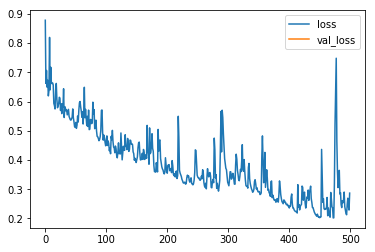

In [36]:
#training the model
model.fit(X_train,y_train,
         epochs  =500,
        callbacks = [plot_losses],
         verbose= 2)

In [37]:
i = 0
X_test = []
while i<len(test_input):
    print('processing file: ',i)
    filename = 'data/cats_dogs/' + test_input[i]
    mfccs, chroma, mel, contrast,tonnetz = extract_feature(filename)
    features = []
    features.append(np.mean(mfccs))
    features.append(np.mean(chroma))
    features.append(np.mean(mel))
    features.append(np.mean(contrast))
    features.append(np.mean(tonnetz))
    X_test.append(features)
    i = i +1
X_test = np.asarray(X_test)

processing file:  0
processing file:  1
processing file:  2
processing file:  3
processing file:  4
processing file:  5
processing file:  6
processing file:  7
processing file:  8
processing file:  9
processing file:  10
processing file:  11
processing file:  12
processing file:  13
processing file:  14
processing file:  15
processing file:  16
processing file:  17
processing file:  18
processing file:  19
processing file:  20
processing file:  21
processing file:  22
processing file:  23
processing file:  24
processing file:  25
processing file:  26
processing file:  27
processing file:  28
processing file:  29
processing file:  30
processing file:  31
processing file:  32
processing file:  33
processing file:  34
processing file:  35
processing file:  36
processing file:  37
processing file:  38
processing file:  39
processing file:  40
processing file:  41
processing file:  42
processing file:  43
processing file:  44
processing file:  45
processing file:  46
processing file:  47
pr

In [38]:
predicted = model.predict(X_test)

In [39]:
#changing the output as 0 or 1
i = 0
while i<len(predicted):
    if predicted[i] >=.5:
        predicted[i] = 1
    else:
        predicted[i] = 0
    i = i +1
y_test = np.asarray(predicted)

In [40]:
predicted = predicted.reshape([-1])
print(predicted.shape)

(84,)


Confusion matrix, without normalization
[[42  0]
 [ 0 42]]
Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


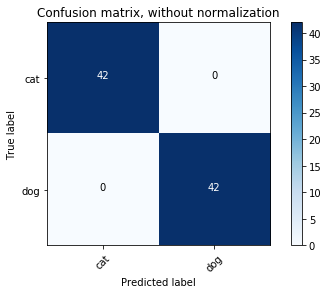

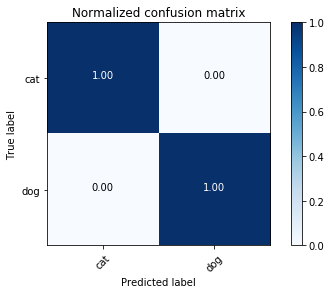

In [41]:
#plotting the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['cat','dog'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['cat','dog'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()